Used Car Price Prediction

This project focused on building a used car price prediction model to help businesses optimize their pricing strategies. By identifying which car features drive price changes, the analysis supports better decision-making across several key business metrics. For example, more accurate pricing can lower CAC by attracting the right buyers faster. Understanding what customers value improves CLTV by boosting long-term satisfaction. Consistent pricing strategies also help stabilize MRR and reduce Churn Rate, while insights into buyer behavior increase ARPU. Altogether, the model improves ROI by turning data into smarter, more profitable actions.

Variables(in order):

Car_ID -(numerical variable): Car identifier.

Symboling - (categorical variable): average degree of auto is more risky than its price indicates

CarName - (categorical variable): models of different car makes

Fueltype - (categorical variable): type of fuel used (Gas or Diesel)

Aspiration- (categorical variable): types of car engines (Std or Turbo)

Doornumber- (categorical variable): the number of doors in the car(two or four)

Carbody- (categorical variable): types of car body styles(convertible, hatchback, sedan, wagon, hatchtop)

Drivewheel- (categorical variable): drive mode (rwd, fwd, 4wd)

Enginelocation- (categorical variable): engine installation location(front or rear)

Wheelbase- (numerical variable): The horizontal distance between the centers of the front and rear wheels of the car

Carlength:-(numerical variable): length of vehicle

Carwidth- (numerical variable): width of vehicle

Carheight- (numerical variable): height of vehicle

Curbweight- (numerical variable): weight of vehicle

Enginetype- (categorical variable): The type of engine or engines powering the vehicle. (dohc, dohcv, ohcv, ohc, ohcf, rotor, l)

Cylindernumber- (categorical variable): The number of cylinders of the engine(two, twelve, three, four, five, six, eight)

Enginesize- (numerical variable): The size of the engine

Fuelsystem- (categorical variable): Fuel system of the engine(1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi)

Boreratio- (numerical variable): The ratio between the size of the cylinder bore of an engine and its piston stroke length

Stroke- (numerical variable): A phase of the engine's cycle

Compressionratio- (numerical variable): The ratio of the cylinders and combustion chambers of an engine at their maximum and minimum values

Horsepower- (numerical variable): The output power of the engine

Peakrpm- (numerical variable): The engine's peak horsepower speed

Citympg- (numerical variable): Fuel consumption in urban driving

Highwaympg- (numerical variable): The fuel consumption of the car when driving on the open road

Price- (numerical variable): The price of a car.

Source:
Dataset from :https://www.kaggle.com/datasets/goyalshalini93/car-data

In [160]:
# Import libraries for data manipulation

In [161]:
import pandas as pd
import numpy as np

In [162]:
# Import libraries for data visualization

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

In [164]:
# Import libraries for regression modeling

In [165]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [166]:
# Import libraries for train/test split and scaling

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Load dataset from Google Drive

In [169]:
import requests
from io import StringIO
orig_url='https://drive.google.com/file/d/1kSKi2XM0g3uURvzjNDqQX0NPYKCdTuqd/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
car = pd.read_csv(csv_raw, sep=',')

In [170]:
# Initial data exploration

In [171]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The price of the cars indicated by the variable car is the target variable and the rest are the independent variables based on which we will predict car price.

In [172]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [173]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [174]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [175]:
# Visualizations

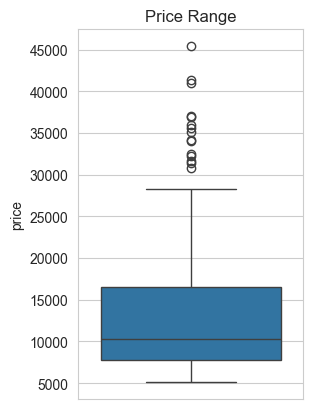

In [176]:
plt.subplot(1,2,2)
plt.title('Price Range')
sns.boxplot(y=car.price)
plt.show()

There is a significant difference between the mean and the median of the price distribution.


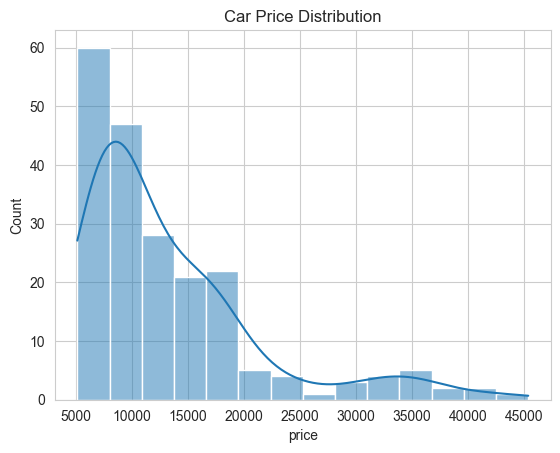

In [177]:
plt.title('Car Price Distribution')
sns.histplot(car.price, kde=True)
plt.show()

The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 20,000).

In [178]:
print(car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


75% of the prices are below 16,560, whereas the remaining 25% are between 16,500 and 45,400.
There is a lot of price gap between the 90th percentile and the 100th percentile. which says that 90% of cars price is below or at 22,500 where as the remaining 10% is in between the 22,500 and 45,400

In [179]:
# Histograms for all columns

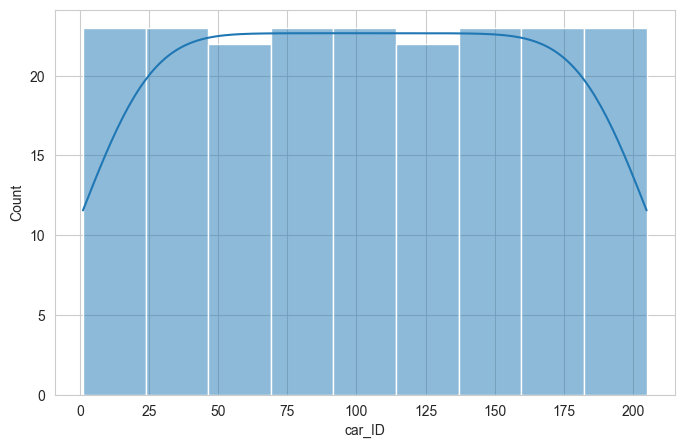

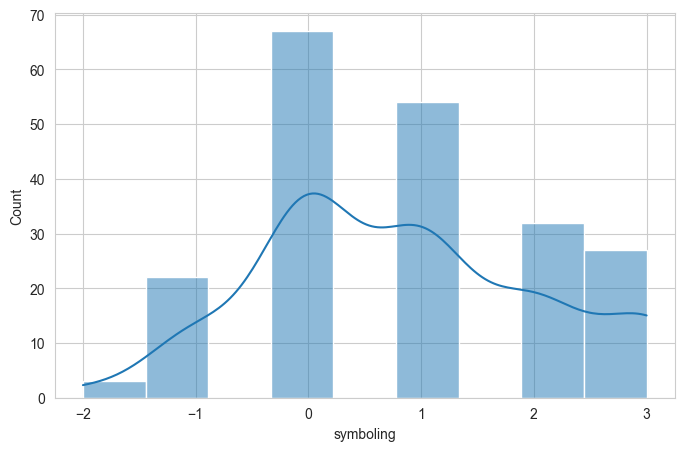

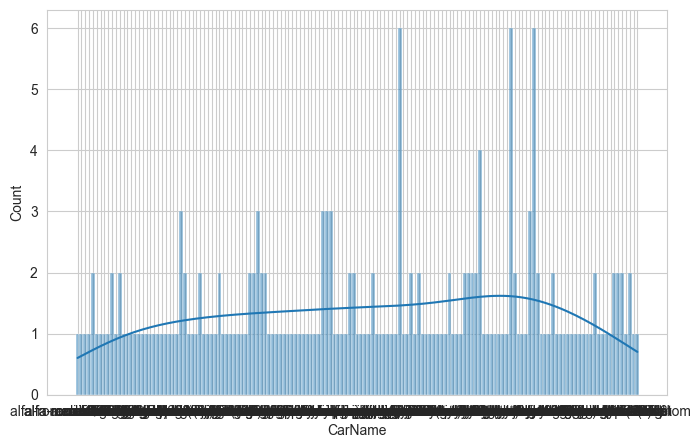

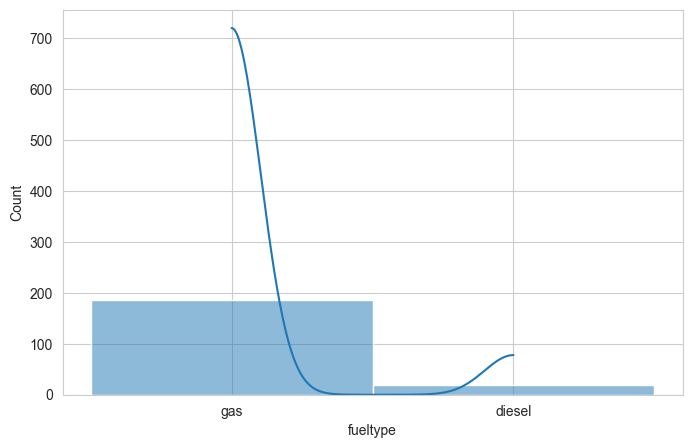

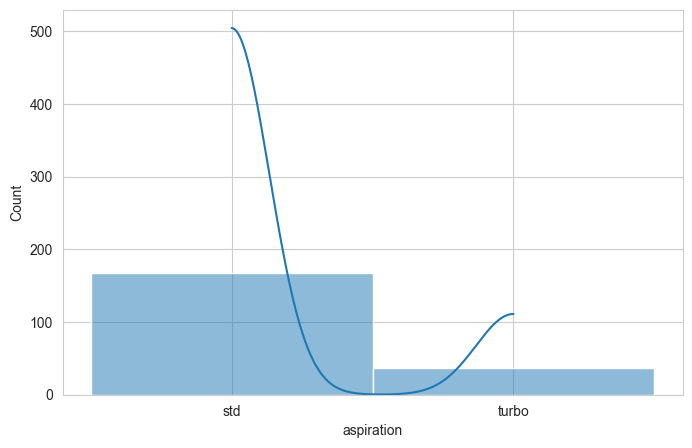

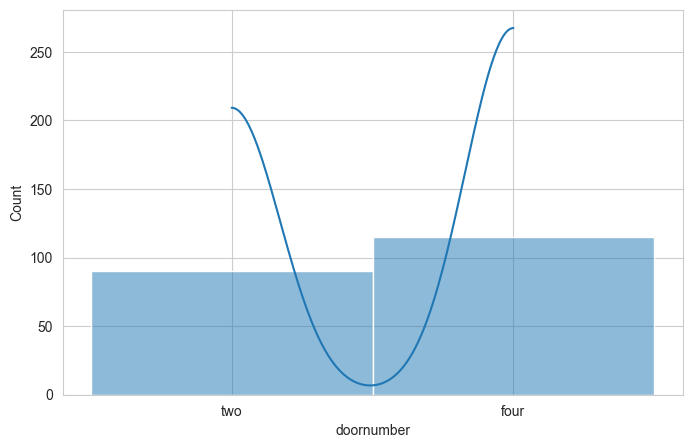

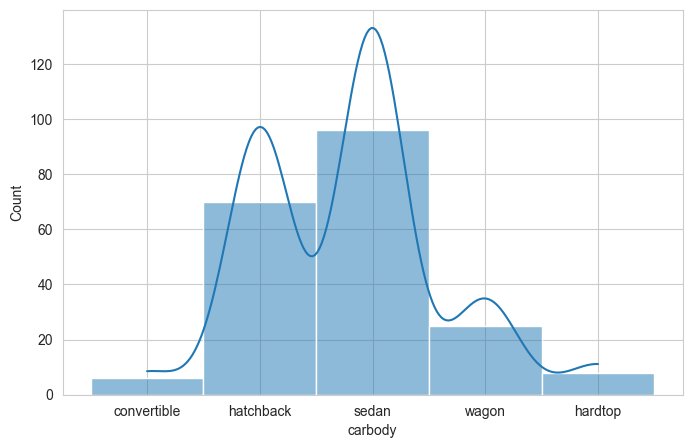

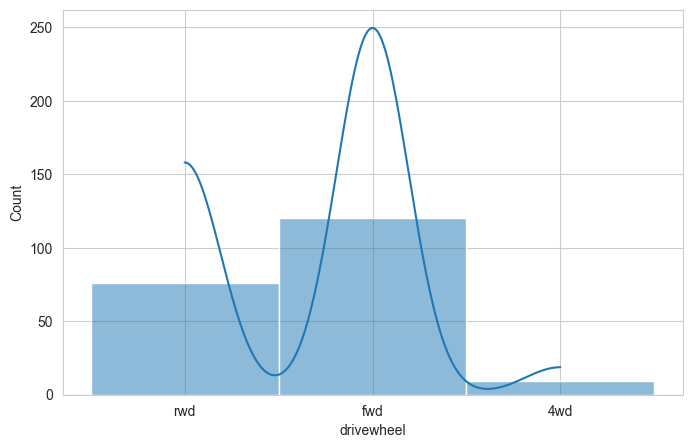

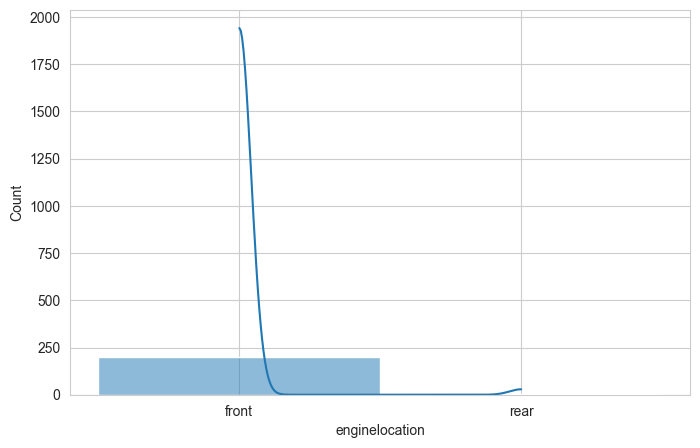

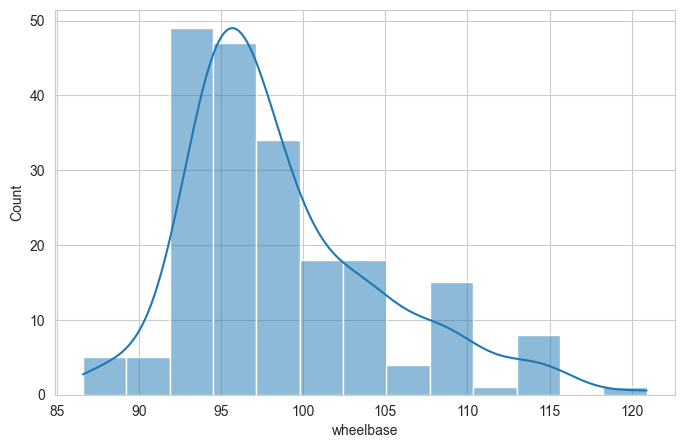

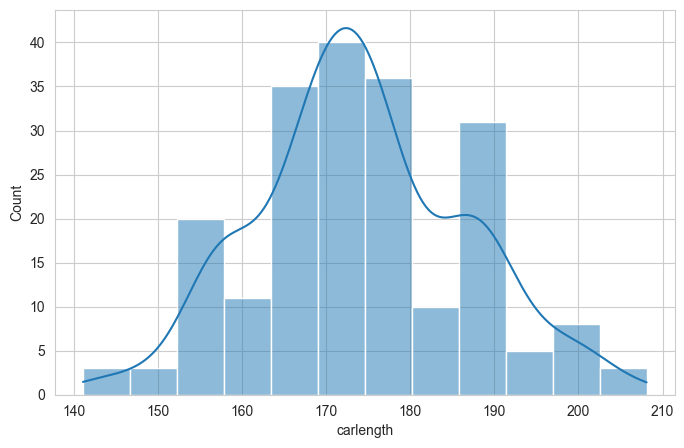

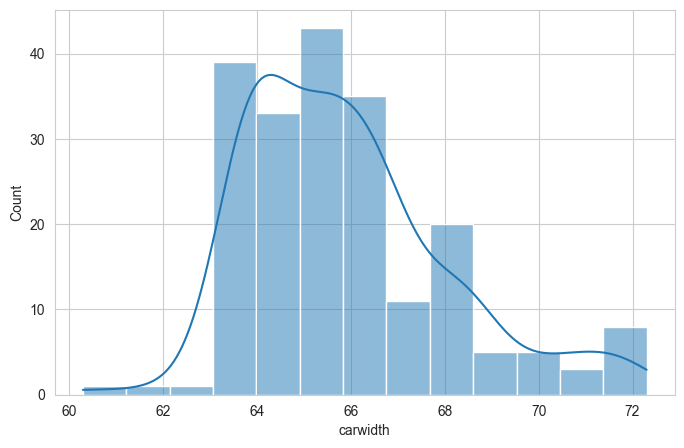

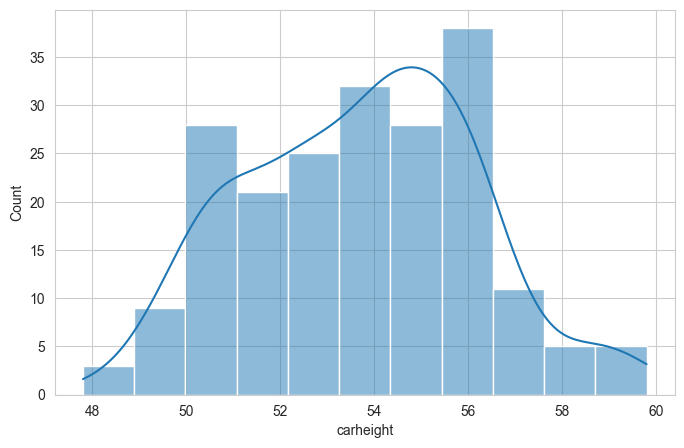

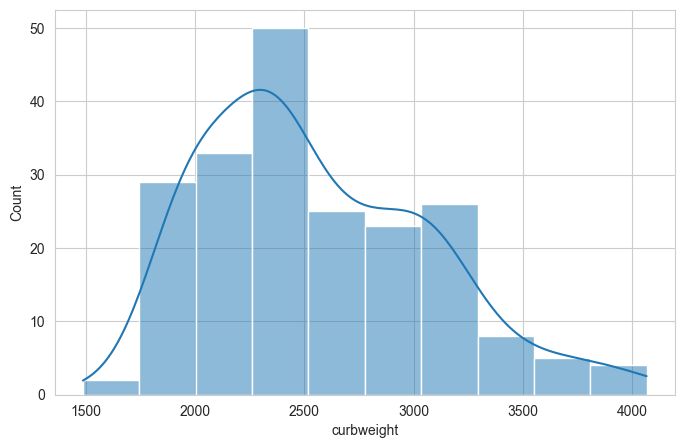

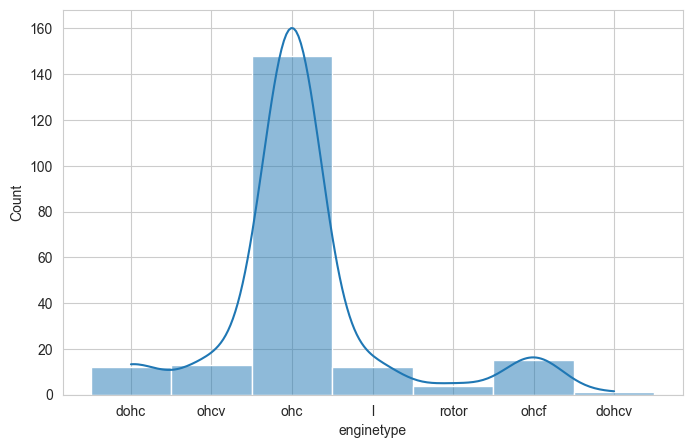

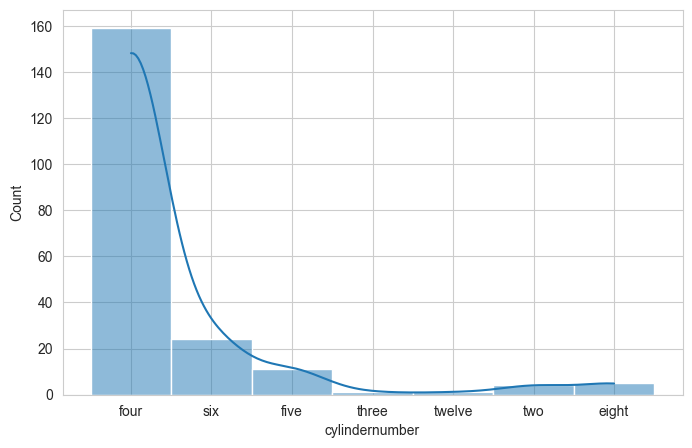

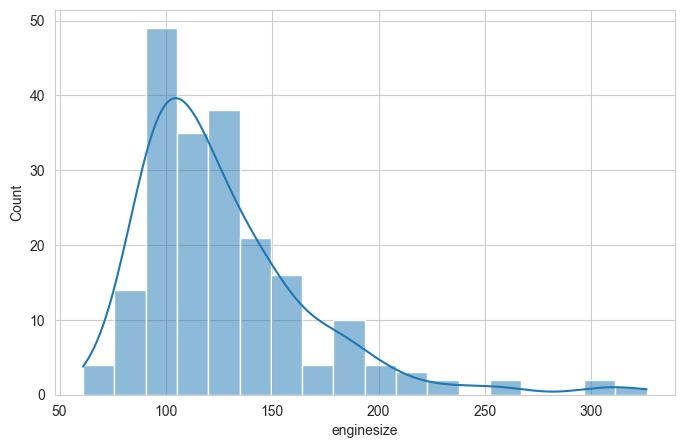

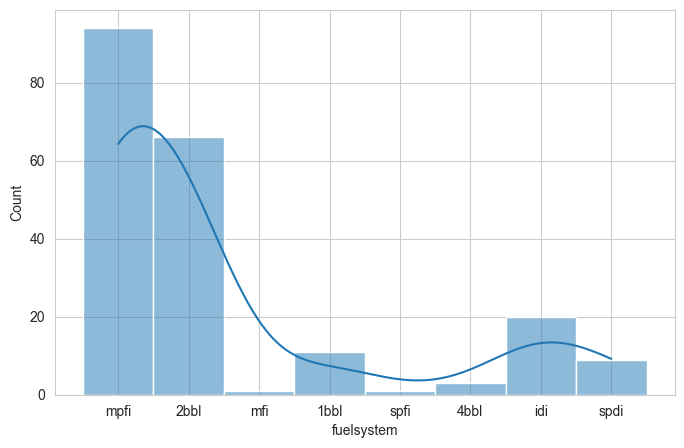

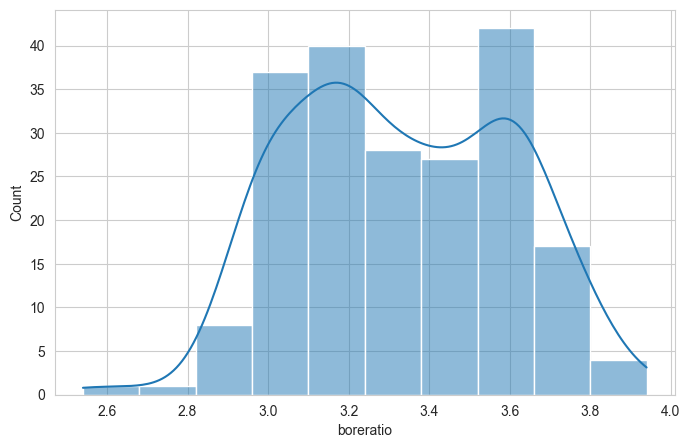

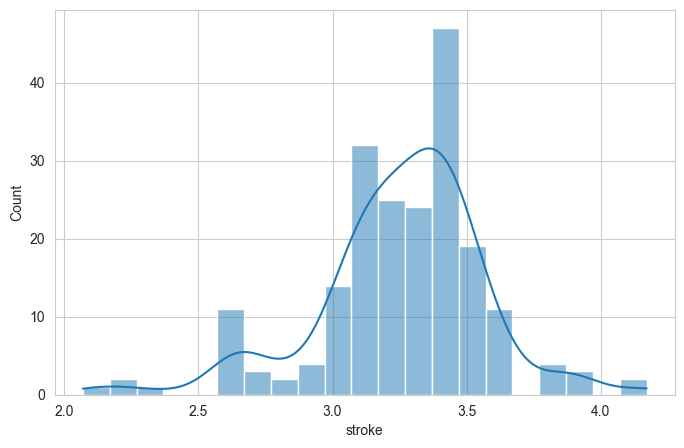

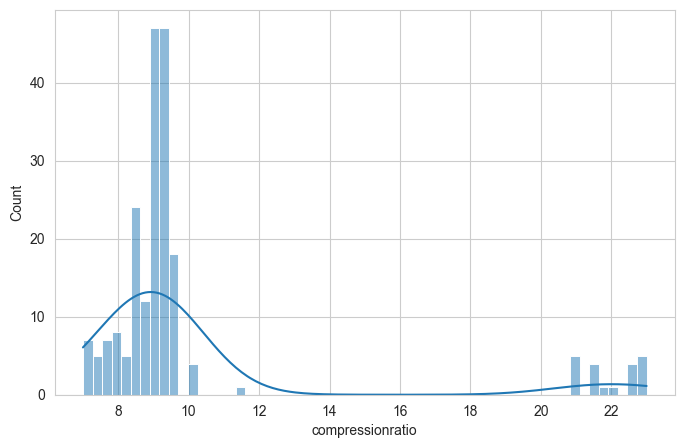

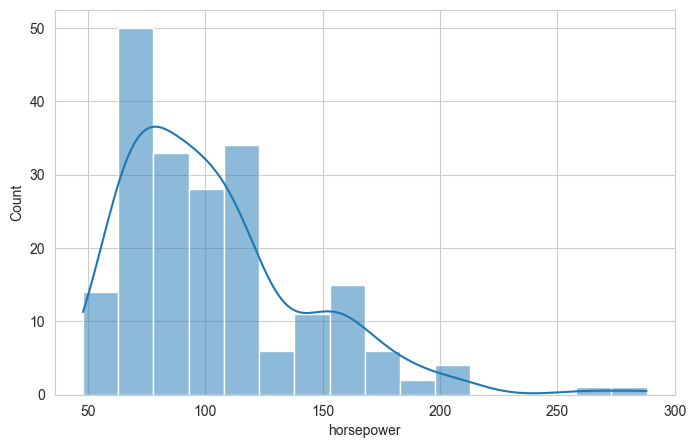

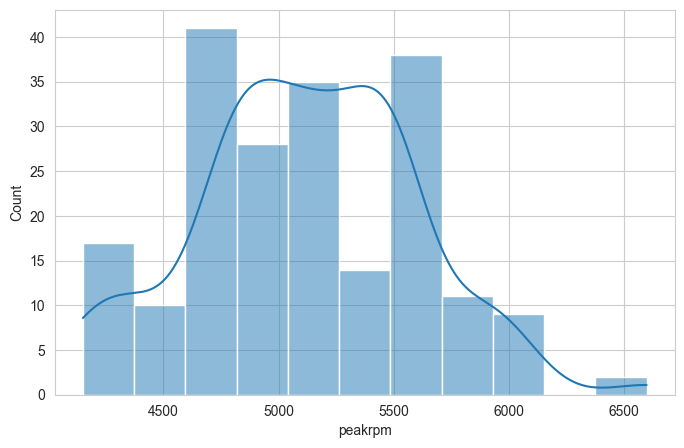

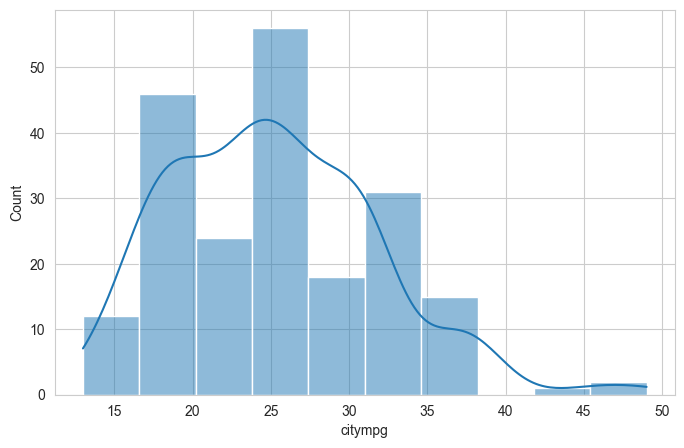

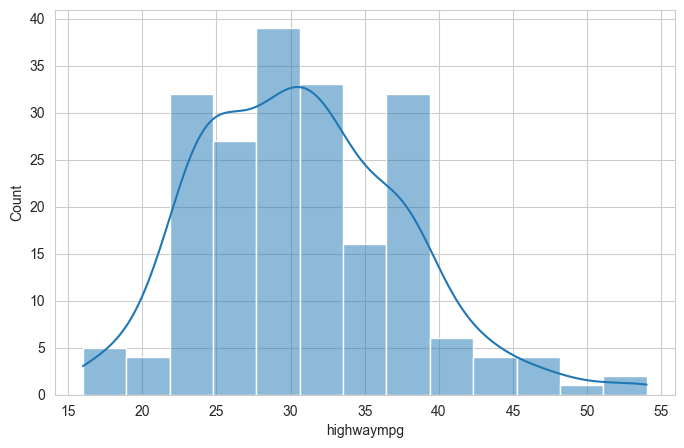

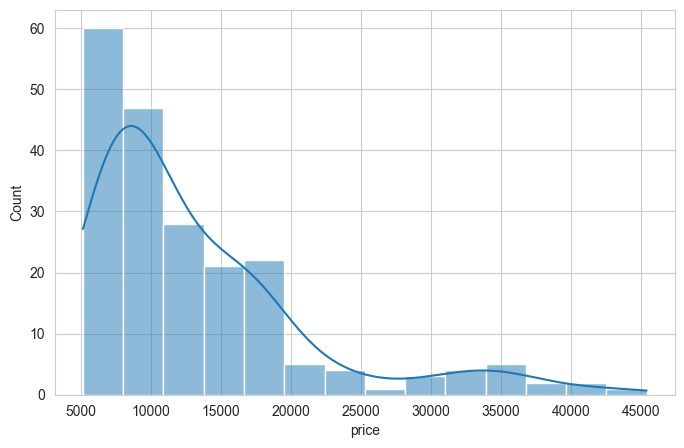

In [180]:
for i in car.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=car, x=i, kde=True)
    plt.show()

In [181]:
# Log transform price

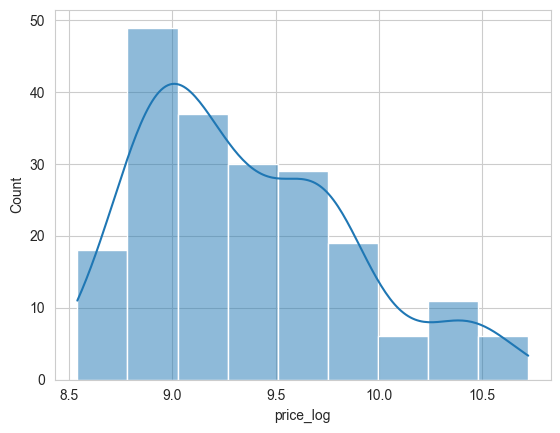

In [182]:
car['price_log'] = np.log(car['price'])
sns.histplot(data=car, x='price_log', kde=True)
plt.show()

In [183]:
# Category visualizations

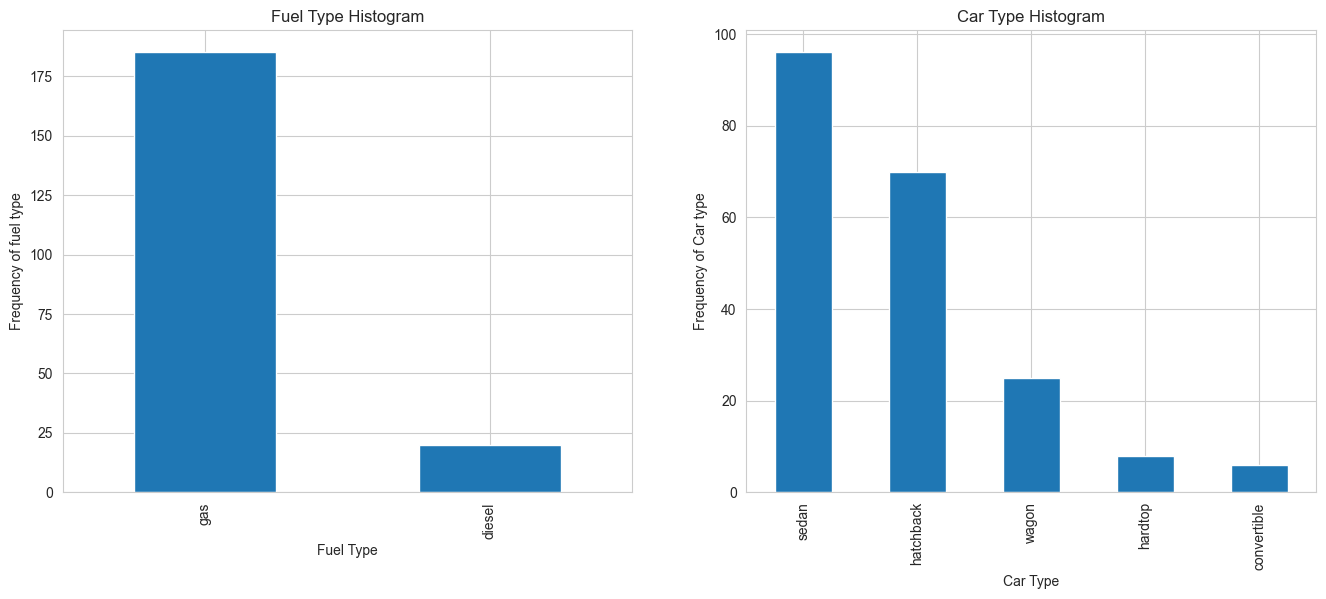

In [184]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,2)
plt1 = car.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of fuel type')
plt.subplot(1,3,3)
plt1 = car.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel='Car Type', ylabel='Frequency of Car type')
plt.show()

From the visualization we can say that

Number of gas fueled cars are more than diesel.
Sedan is the top car type prefered.

In [185]:
# Correlation heatmap

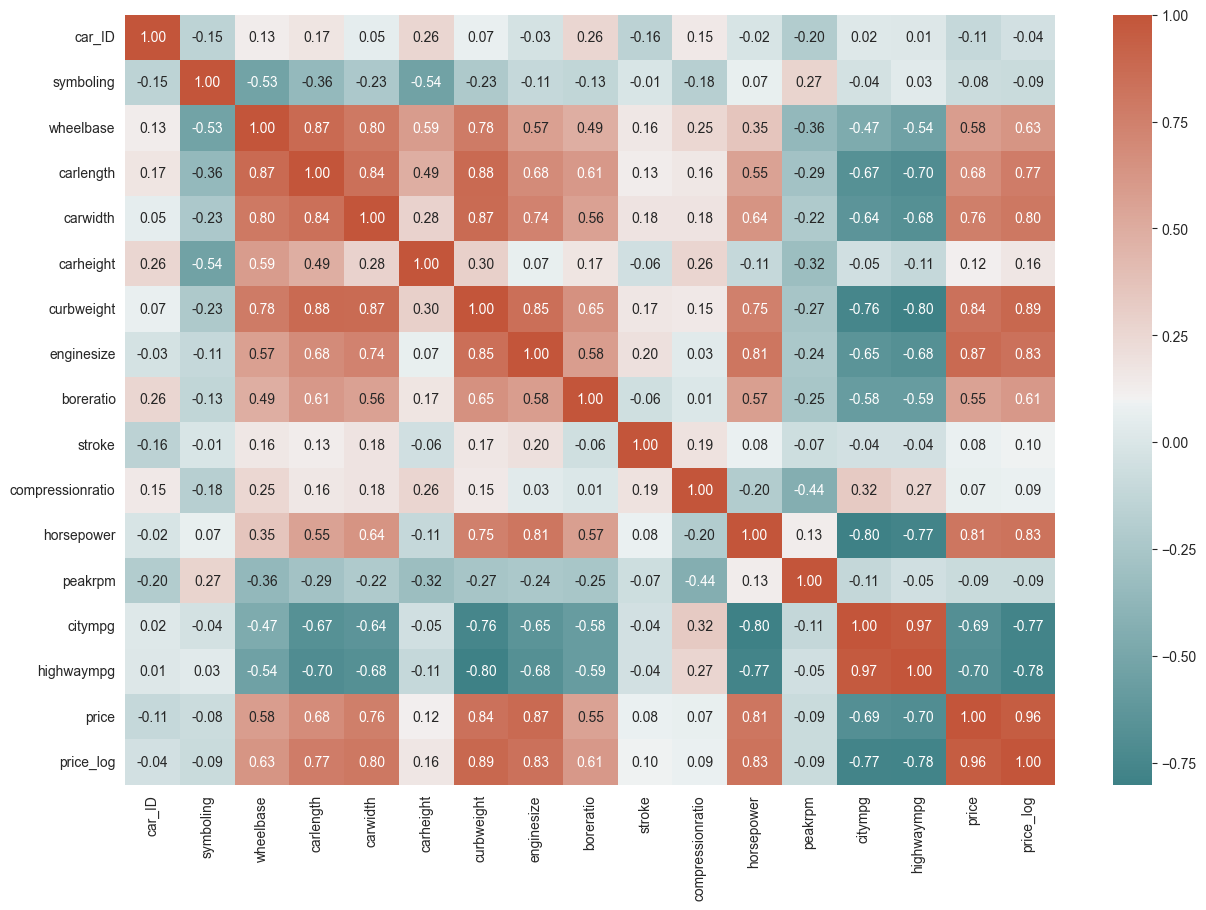

In [186]:
new_car = car.select_dtypes(include=[np.number])
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(200,20, as_cmap=True)
sns.heatmap(new_car.corr(), annot=True, fmt='.2f', cmap=cmap)
plt.show()

STRONG POSITIVE CORRELATION:

Wheelbase and Carlength
Price and EngineSize
Highwaympg and Citympg
Horsepower and Price
WEAK NEGATIVE CORRELATION

Carheight and Citympg
Peakrpm and Stroke
Horsepower and Carheight
Enginesize and peakrpm

In [187]:
# Scatterplots for various features

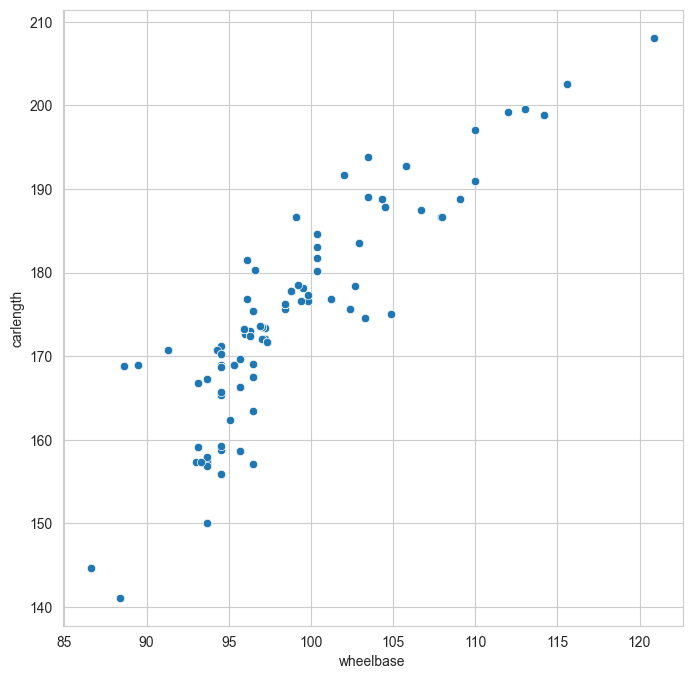

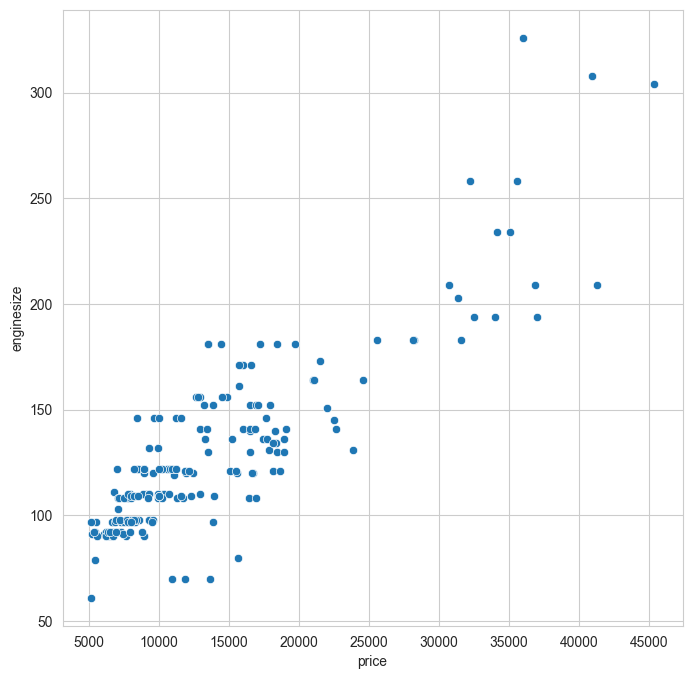

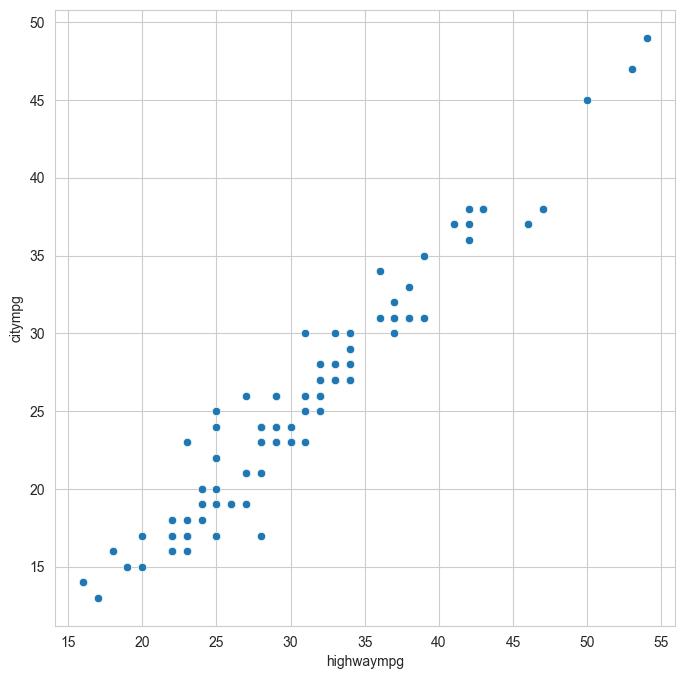

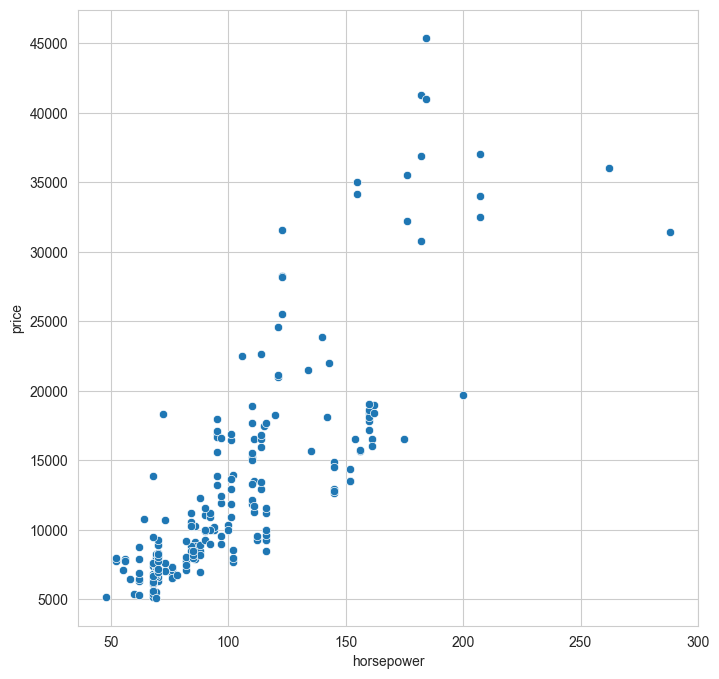

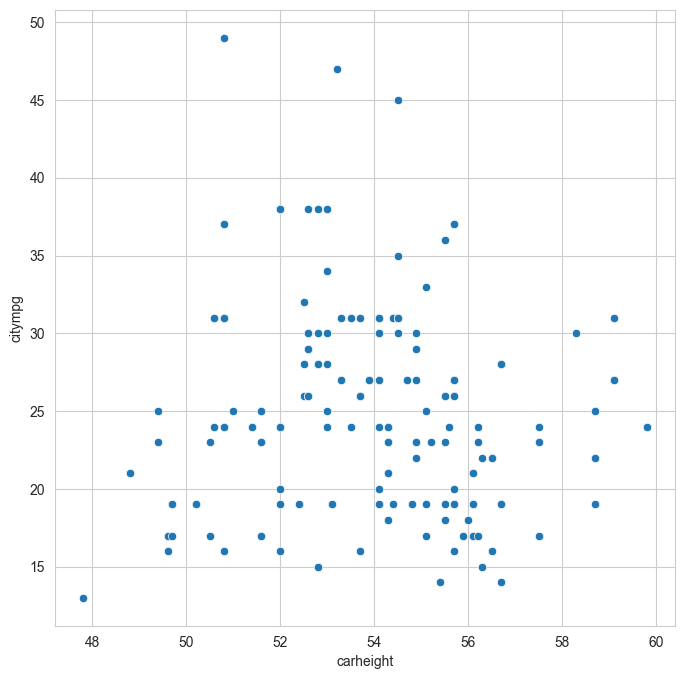

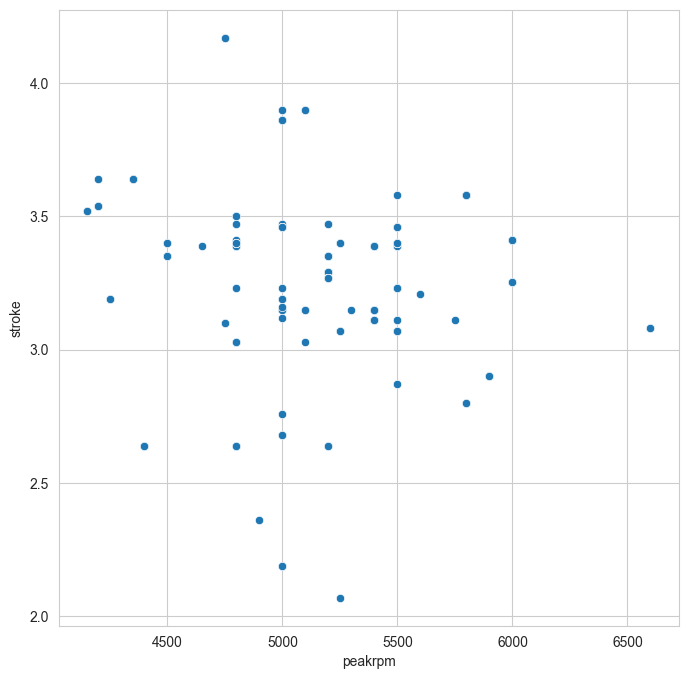

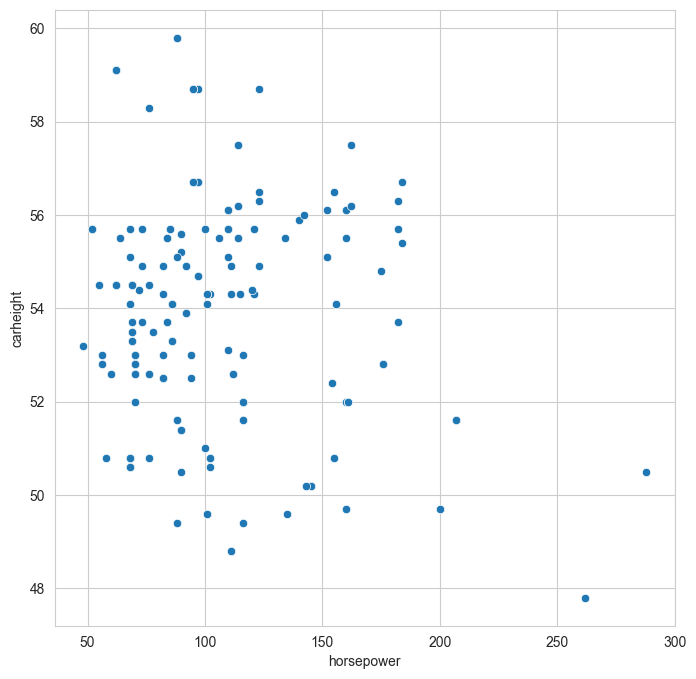

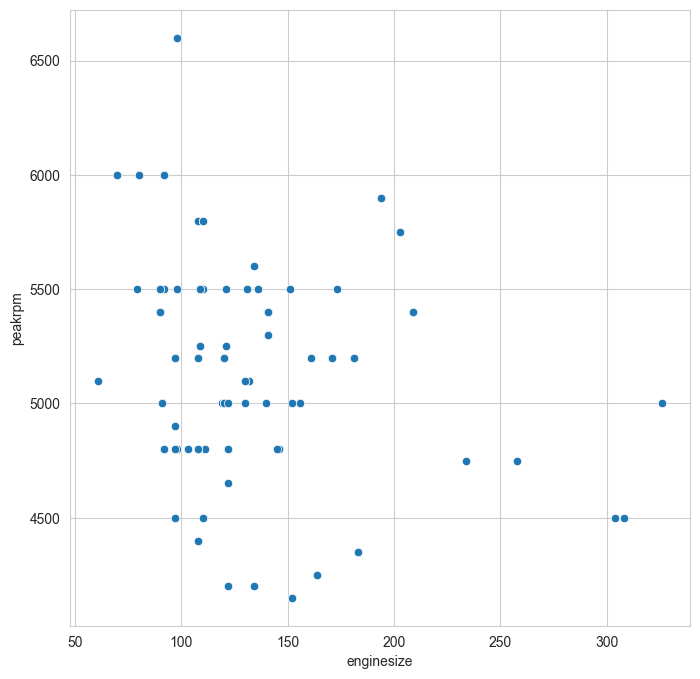

In [188]:
features = [('wheelbase', 'carlength'), ('price', 'enginesize'), ('highwaympg', 'citympg'), ('horsepower', 'price'),('carheight', 'citympg'), ('peakrpm', 'stroke'), ('horsepower', 'carheight'), ('enginesize', 'peakrpm')]
for x, y in features:
    plt.figure(figsize=(8,8))
    sns.scatterplot(data=car, x=x, y=y)
    plt.show()

In [189]:
# Boxplot for engine type vs price

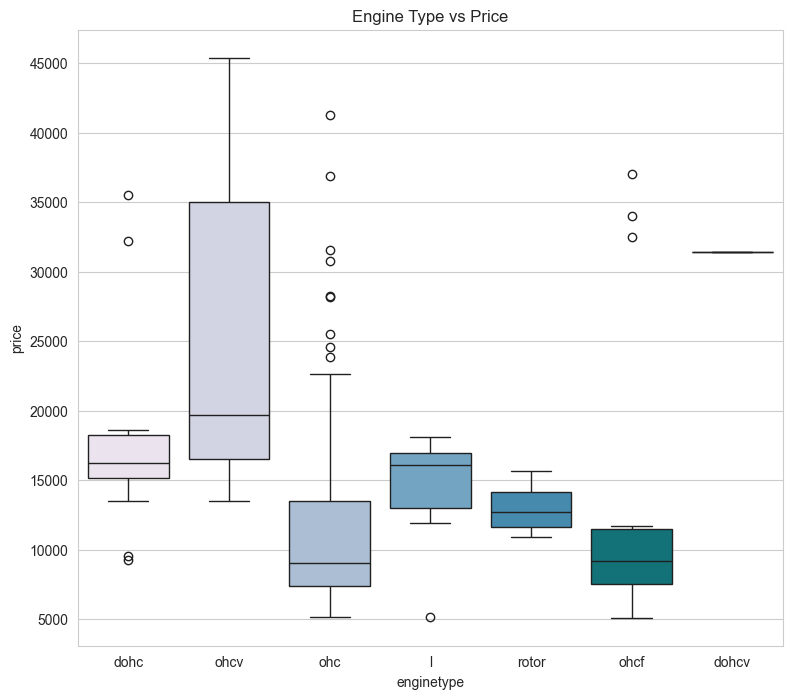

In [190]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=car.enginetype, y=car.price, palette='PuBuGn')
plt.show()

In [191]:
# Grouped bar charts

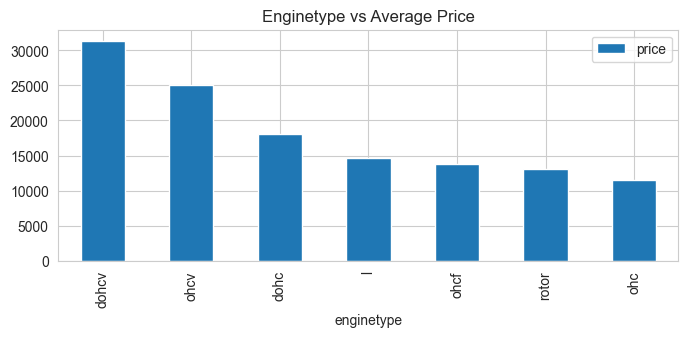

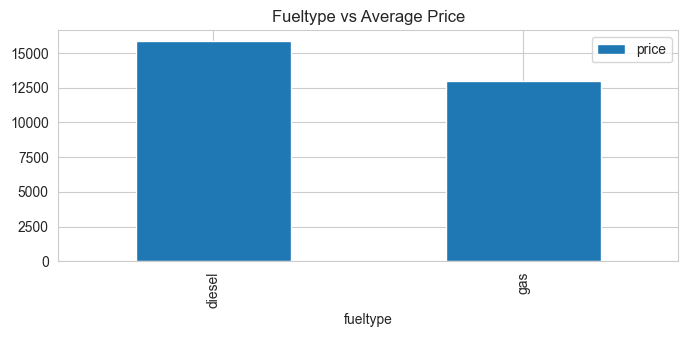

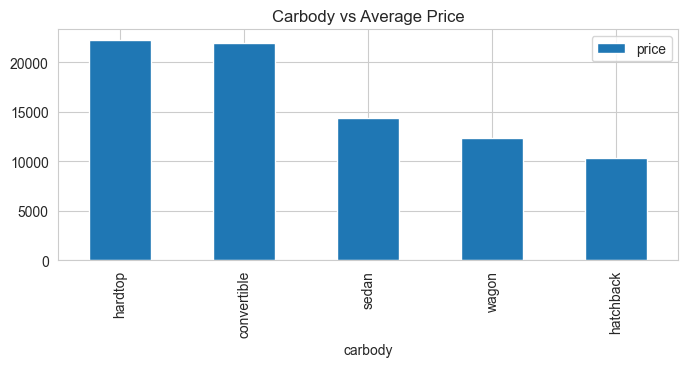

In [192]:
for group in ['enginetype', 'fueltype', 'carbody']:
    df = pd.DataFrame(car.groupby([group])['price'].mean().sort_values(ascending=False))
    df.plot.bar(figsize=(8,3))
    plt.title(f'{group.capitalize()} vs Average Price')
    plt.show()

ohc Engine type seems to be most favored type.

ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

Diesel has higher average price than gas.
Hardtop and Convertible have higher average price.

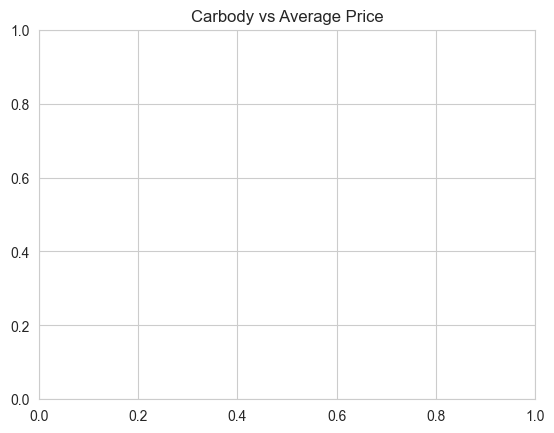

In [193]:
    plt.title(f'{group.capitalize()} vs Average Price')
    plt.show()

In [194]:
# Dummy encoding

In [195]:
car_categorical_dummies = car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','enginelocation','enginetype', 'cylindernumber', 'enginesize','fuelsystem', 'boreratio','horsepower', 'carlength','carwidth']]
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df
for col in ['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']:
    car_categorical_dummies = dummies(col, car_categorical_dummies)
sns.pairplot(car_categorical_dummies)
plt.show()

dropping categorical values columns to calculate VIF as all the columns has to have numerical values for VIF and creating summies would create many columns which impacts the VIF values

In [196]:
# Regression modeling and diagnostics

In [197]:
Y = car['price_log']
X = car.drop(columns={'price','price_log','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'})
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(train):
    vif = pd.DataFrame()
    vif['feature'] = train.columns
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif
print(checking_vif(X_train))


             feature          VIF
0              const  4049.354911
1             car_ID     1.362944
2          wheelbase     6.969493
3          carlength     9.874873
4           carwidth     5.184569
5          carheight     2.165721
6         curbweight    14.010541
7         enginesize     6.575881
8          boreratio     1.949698
9             stroke     1.171065
10  compressionratio     2.033473
11        horsepower     8.704614
12           peakrpm     2.118820
13           citympg    24.460016
14        highwaympg    20.564595


There are three variables with a high VIF - curbweight, citympg and highwaympg. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

when we create dummies and proceed to calculate VIF its shwoing as inf for the VIF values. In the context of Variance Inflation Factor (VIF) output, "inf" stands for "infinity." When you see "inf" as the VIF value for a specific feature, it indicates that there is perfect multicollinearity between that feature and the other features in your dataset.

Perfect multicollinearity means that one or more independent variables in our regression model can be exactly predicted from the others, which can cause issues in regression analysis. In the case of VIF, a VIF value of "inf" means that the variance of the coefficient for that specific feature is infinitely high due to the linear relationship with other features. It suggests that the feature should be considered for removal from the model or that you need to address the multicollinearity issue in your data before proceeding with regression analysis.

To address this issue, we can consider:

Removing one of the highly correlated variables. Combining the correlated variables into a single composite variable. Collecting more data if possible to reduce multicollinearity. Ultimately, the goal is to have VIF values close to 1 or less, which indicates that the variables are not highly correlated with each other.

In [198]:
X_train = X_train.drop(columns=['curbweight','citympg','highwaympg'])
print(checking_vif(X_train))


             feature          VIF
0              const  3284.364517
1             car_ID     1.300164
2          wheelbase     6.534201
3          carlength     7.057636
4           carwidth     4.978530
5          carheight     2.141575
6         enginesize     5.618988
7          boreratio     1.873678
8             stroke     1.153306
9   compressionratio     1.471399
10        horsepower     6.186207
11           peakrpm     1.992970


In [199]:
model1 = sm.OLS(y_train,X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     82.03
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           3.34e-53
Time:                        17:26:28   Log-Likelihood:                 41.986
No. Observations:                 143   AIC:                            -59.97
Df Residuals:                     131   BIC:                            -24.42
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5695      0.903      3.952      0.000       1.783       5.356
car_ID              -0.0013      0.000     -4.177      0.000      -0.002      -0.001
wheelbase           -0.0030      0.007     -0.439      0.661      -0.016       0.010
carlength            0.0106      0.004      2.964      0.004       0.004       0.018
carwidth             0.0275      0.016      1.684      0.095      -0.005       0.060
carheight            0.0176      0.009      1.928      0.056      -0.000       0.036
enginesize           0.0028      0.001      3.081      0.003       0.001       0.005
boreratio            0.1142      0.080      1.435      0.154      -0.043       0.272
stroke              -0.1263      0.054     -2.345      0.021      -0.233      -0.020
compressionratio     0.0244      0.005      4.928      0.000       0.015       0.034
horsepower           0.0055      0.001      5.862      0.000       0.004       0.007
peakrpm           8.773e-05   4.88e-05      1.799      0.074   -8.73e-06       0.000
==============================================================================
Omnibus:                        3.914   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                4.834
Skew:                          -0.004   Prob(JB):                       0.0892
Kurtosis:                       3.901   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F-statistic is well beyond the critical range and suggests that the model is statistically significant.
The R-squared and the adjusted R-squared values indicate that the model explains nearly 86% of the variation in home value.
All predictor variables except for car_ID, wheelbase, enginesize and horsepower are statistically significant.

In [200]:
Y = car['price_log']
X = car.drop(columns={'price','price_log','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'})
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(train):
    vif = pd.DataFrame()
    vif['feature'] = train.columns
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif
print(checking_vif(X_train))
X_train = X_train.drop(columns=['curbweight','citympg','highwaympg'])
print(checking_vif(X_train))
model1 = sm.OLS(y_train,X_train).fit()
model1.summary()

             feature          VIF
0              const  4049.354911
1             car_ID     1.362944
2          wheelbase     6.969493
3          carlength     9.874873
4           carwidth     5.184569
5          carheight     2.165721
6         curbweight    14.010541
7         enginesize     6.575881
8          boreratio     1.949698
9             stroke     1.171065
10  compressionratio     2.033473
11        horsepower     8.704614
12           peakrpm     2.118820
13           citympg    24.460016
14        highwaympg    20.564595
             feature          VIF
0              const  3284.364517
1             car_ID     1.300164
2          wheelbase     6.534201
3          carlength     7.057636
4           carwidth     4.978530
5          carheight     2.141575
6         enginesize     5.618988
7          boreratio     1.873678
8             stroke     1.153306
9   compressionratio     1.471399
10        horsepower     6.186207
11           peakrpm     1.992970


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     82.03
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           3.34e-53
Time:                        17:26:28   Log-Likelihood:                 41.986
No. Observations:                 143   AIC:                            -59.97
Df Residuals:                     131   BIC:                            -24.42
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5695      0.903      3.952      0.000       1.783       5.356
car_ID              -0.0013      0.000     -4.177      0.000      -0.002      -0.001
wheelbase           -0.0030      0.007     -0.439      0.661      -0.016       0.010
carlength            0.0106      0.004      2.964      0.004       0.004       0.018
carwidth             0.0275      0.016      1.684      0.095      -0.005       0.060
carheight            0.0176      0.009      1.928      0.056      -0.000       0.036
enginesize           0.0028      0.001      3.081      0.003       0.001       0.005
boreratio            0.1142      0.080      1.435      0.154      -0.043       0.272
stroke              -0.1263      0.054     -2.345      0.021      -0.233      -0.020
compressionratio     0.0244      0.005      4.928      0.000       0.015       0.034
horsepower           0.0055      0.001      5.862      0.000       0.004       0.007
peakrpm           8.773e-05   4.88e-05      1.799      0.074   -8.73e-06       0.000
==============================================================================
Omnibus:                        3.914   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                4.834
Skew:                          -0.004   Prob(JB):                       0.0892
Kurtosis:                       3.901   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the R-squared value has decreased by 0.02, since we have removed variables from the model, whereas the adjusted R-squared value has decreased by 0.03, since we removed statistically insignificant variables only.

In [201]:
# Refined model with reduced features

In [202]:
Y = car['price_log']
X = car.drop(columns={'price','price_log','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','car_ID','wheelbase','enginesize','horsepower'})
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
model2 = sm.OLS(y_train,X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     75.00
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           1.75e-49
Time:                        17:26:28   Log-Likelihood:                 30.122
No. Observations:                 143   AIC:                            -38.24
Df Residuals:                     132   BIC:                            -5.654
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6083      1.051      5.336      0.000       3.529       7.687
carlength           -0.0072      0.004     -1.945      0.054      -0.015       0.000
carwidth             0.0461      0.017      2.761      0.007       0.013       0.079
carheight           -0.0029      0.009     -0.332      0.741      -0.021       0.015
curbweight           0.0007   9.87e-05      6.642      0.000       0.000       0.001
boreratio            0.0767      0.082      0.934      0.352      -0.086       0.239
stroke              -0.1023      0.057     -1.783      0.077      -0.216       0.011
compressionratio     0.0229      0.006      3.721      0.000       0.011       0.035
peakrpm              0.0001   4.67e-05      2.852      0.005    4.08e-05       0.000
citympg             -0.0534      0.012     -4.556      0.000      -0.077      -0.030
highwaympg           0.0309      0.011      2.806      0.006       0.009       0.053
==============================================================================
Omnibus:                       19.557   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.675
Skew:                           0.850   Prob(JB):                     7.23e-06
Kurtosis:                       4.041   Cond. No.                     3.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the R-squared value has decreased by 0.02, since we have removed variables from the model, whereas the adjusted R-squared value has decreased by 0.03, since we removed statistically insignificant variables only.

In [203]:
# Residual diagnostics

In [204]:
residuals = model2.resid
print(residuals.mean())

-1.4285387170002014e-15


In [205]:
# Residual plot and normality check

In [206]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.8432625703431007), ('p-value', 0.7450460577121153)]

The p-value is small, therefore we reject the premise that the resduals are homoskedastic and conclude that there is in fact heteroskedasitcity present in the residuals. This means that the residuals do not have a constant variance.

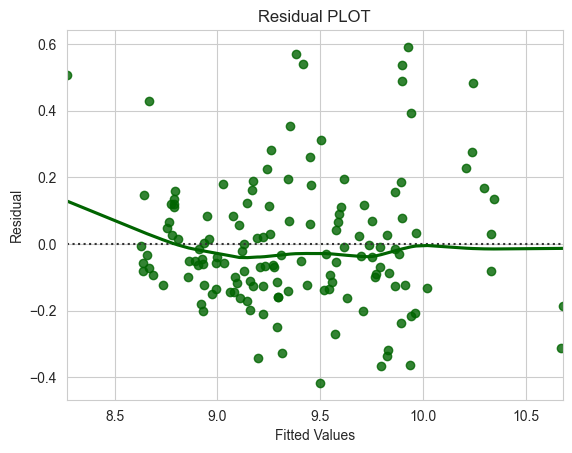

In [207]:
fitted = model2.fittedvalues
sns.set_style('whitegrid')
sns.residplot(x=fitted, y=residuals, color='darkgreen', lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Residual PLOT')
plt.show()

The residual plot suggests that the residuals are not random as there is a pattern of average fitted values being associated with a tendency of the model to overpredict while small and large fitted values are associated with a tendency of the model to underpredict.

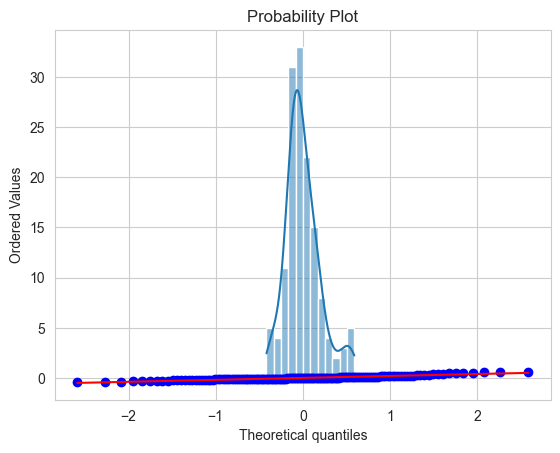

In [208]:
sns.histplot(residuals, kde=True)
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)
plt.show()

The histogram and the normal probability plot show some evidence that the residuals are right skewed.

In [209]:
# Model performance metrics

In [210]:
def rmse(predictions, targets): return np.sqrt(((predictions - targets) ** 2).mean())
def mape(predictions, targets): return np.mean(np.abs((predictions - targets) / targets)) * 100
def mae(predictions, targets): return np.mean(np.abs((predictions - targets)))
def model_pref(olsmodel, x_train, x_test):
    y_pred_train = olsmodel.predict(x_train)
    y_pred_test = olsmodel.predict(x_test)
    print(pd.DataFrame({'Data': ['Train','Test'],
        'RMSE': [rmse(y_pred_train, y_train), rmse(y_pred_test, y_test)],
        'MAE': [mae(y_pred_train, y_train), mae(y_pred_test, y_test)],
        'MAPE': [mape(y_pred_train, y_train), mape(y_pred_test, y_test)]}))
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.196011  0.147595  1.553982
1   Test  0.206464  0.164196  1.760372


The testing data has a slightly larger RMSE than the training data which suggest that the model may be experiencing overfitting

The training data RMSE is typically lower because the model was trained to fit the training data as closely as possible.
The testing data RMSE is slightly higher because the model may not generalize well to new, unseen data points, leading to a less accurate prediction.
To address this issue, you can consider the following:

Regularization techniques: Implement regularization methods like L1 (Lasso) or L2 (Ridge) regularization to penalize large coefficients and reduce overfitting.
Feature selection: Identify and remove irrelevant or redundant features to simplify the model and reduce overfitting.
Cross-validation: Use cross-validation techniques like k-fold cross-validation to assess the model's performance on different subsets of the data and ensure it generalizes well.
Collect more data: Increasing the size of your dataset may help the model learn more representative patterns and reduce overfitting.

In [211]:
# Cross Validation

In [212]:
from sklearn.model_selection import cross_val_score
linearregression = LinearRegression()
cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv=10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('RSquared: %0.3f (+/- %0.3f)' % (cv_Score11.mean(), cv_Score11.std() * 2))
print('Mean Squared Error: %0.3f (+/- %0.3f)' % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.799 (+/- 0.216)
Mean Squared Error: 0.046 (+/- 0.038)


The R-squared on the cross validation is 0.79, whereas on the training dataset it was 0.850

In [213]:
# Model coefficients and final equation

In [214]:
coef = model2.params
out = pd.DataFrame(coef[:-2], columns=['Coefficients'])
out

,Coefficients
const,5.608264
carlength,-0.007198
carwidth,0.046070
carheight,-0.002946
curbweight,0.000655
boreratio,0.076737
stroke,-0.102343
compressionratio,0.022910
peakrpm,0.000133


In [215]:
Equation = 'log (Price) ='
print(Equation)
for i in range(len(coef)):
    print(f'({coef[i]}) * {coef.index[i]} +')

log (Price) =
(5.608264017174029) * const +
(-0.0071976907096626555) * carlength +
(0.04607008751635872) * carwidth +
(-0.0029459596406089393) * carheight +
(0.0006554518642488422) * curbweight +
(0.07673660976827422) * boreratio +
(-0.10234335362045416) * stroke +
(0.022910385923873858) * compressionratio +
(0.00013324305723922105) * peakrpm +
(-0.05341880266685307) * citympg +
(0.030867908243301167) * highwaympg +


The car features coefficients help us understand how changes in each feature impact the predicted car price. Features with positive coefficients are associated with price increases as they increase, while features with negative coefficients are associated with price decreases as they increase.

The intercept, with a value of approximately 5.608264, represents the estimated car price when all other features are zero. In practical terms, this value is often considered as a base price or a starting point.

A negative coefficient carlength, carheight, and stroke suggests that as these car features increases, car price tends to decrease, all else being equal. This indicates a negative correlation between these features and price.

A positive coefficient carwidth, curbweight, boreratio, compressionratio and peakrpm suggests that as these features increases, car price tends to increase, all else being equal. This indicates a positive correlation between these features and price.

The model can be used to predict car price relatively well using measurements for the features included in this analysis.